# &#x1F4D1; &nbsp;  $\mathfrak {\color{#348ABD} {P5: \ Build \ a \ Digit \ Recognition \ Program}}$

----
## $\mathfrak {\color{#348ABD} {Code \ Library \ and \ Links}}$

Keras: Deep Learning library for Theano and TensorFlow https://keras.io/
 
Deep MNIST for Experts https://www.tensorflow.org/get_started/mnist/pros

Tensorflow Deep MNIST Advanced Tutorial http://docs.seldon.io/tensorflow-deep-mnist-example.html

In [1]:
from IPython.core.display import HTML
hide_code = ''
HTML('''<script>code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    }
    code_show = !code_show;
} 
$(document).ready(code_display);</script>
<form action="javascript: code_display()"><input style="color: #348ABD; background: ghostwhite; opacity: 0.9; " \
type="submit" value="Click to display or hide code"></form>''')

In [6]:
hide_code

import numpy as np
from time import time

from IPython.display import display, Image, IFrame
import matplotlib.pylab as plt
import matplotlib.cm as cm
from matplotlib import offsetbox
%matplotlib inline

In [7]:
hide_code

import tensorflow as tf
import tensorflow.examples.tutorials.mnist as mnist

In [3]:
hide_code

from sklearn.neural_network import MLPClassifier, BernoulliRBM
from sklearn import linear_model, datasets, metrics
from sklearn.pipeline import Pipeline
from sklearn import manifold, decomposition, ensemble
from sklearn import discriminant_analysis, random_projection
from sklearn.model_selection import train_test_split

In [5]:
hide_code

from keras.models import Sequential, load_model
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers.embeddings import Embedding

----
## $\mathfrak {\color{#348ABD} {Step \ 1:\ Design \ and \ Test \ a \ Model \ Architecture}}$
In this project we will design and implement a deep learning model that learns to recognize sequences of digits. Also we will train the model using synthetic data generated by concatenating character images from [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) or [MNIST](http://yann.lecun.com/exdb/mnist/). To produce a synthetic sequence of digits for testing, we can for example limit ourself to sequences up to five digits, and use five classifiers on top of the deep network. We would have to incorporate an additional ‘blank’ character to account for shorter number sequences.

There are various aspects to consider when thinking about this problem:
- The model can be derived from a deep neural net or a convolutional network.
- We could experiment sharing or not the weights between the softmax classifiers.
- We can also use a recurrent network in your deep neural net to replace the classification layers and directly emit the sequence of digits one-at-a-time.

We can use ** Keras ** to implement your model. Read more at [keras.io](https://keras.io/).

Here is an example of a [published baseline model on this problem](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf). ([video](https://www.youtube.com/watch?v=vGPI_JvLoN0)). You are not expected to model your architecture precisely using this model nor get the same performance levels, but this is more to show an exampe of an approach used to solve this particular problem. We encourage you to try out different architectures for yourself and see what works best for you. Here is a useful [forum post](https://discussions.udacity.com/t/goodfellow-et-al-2013-architecture/202363) discussing the architecture as described in the paper and here is [another one](https://discussions.udacity.com/t/what-loss-function-to-use-for-multi-digit-svhn-training/176897) discussing the loss function.

In [8]:
hide_code

mnist_data = mnist.input_data.read_data_sets("MNIST_data/", one_hot=True)
train_images = mnist_data.train.images
train_labels = mnist_data.train.labels
test_images = mnist_data.test.images
test_labels = mnist_data.test.labels

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
hide_code

print('The first dataset')
print("Shape of the train features - {}, shape of the train target - {}".format(train_images.shape, 
                                                                                train_labels.shape))
print("Shape of the test features - {}, shape of the test target - {}".format(test_images.shape, 
                                                                                test_labels.shape))

The first dataset
Shape of the train features - (55000, 784), shape of the train target - (55000, 10)
Shape of the test features - (10000, 784), shape of the test target - (10000, 10)


In [22]:
hide_code

digits = datasets.load_digits(n_class=10)
X, y = digits.data, digits.target
print('The second dataset')
print("Shape of the features - {}; shape of the target - {}".format(X.shape, y.shape))

The second dataset
Shape of the features - (1797, 64); shape of the target - (1797,)


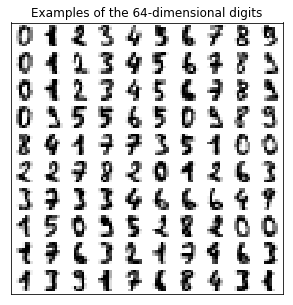

In [23]:
img = np.zeros((100, 100))
for i in range(10):
    ix = 10 * i + 1
    for j in range(10):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * 10 + j].reshape((8, 8))

plt.figure(figsize=(5,5))
plt.imshow(img, cmap=plt.cm.binary)

plt.xticks([])
plt.yticks([])
plt.title('Examples of the 64-dimensional digits');

In [3]:
hide_code

# def model1():
    

''

In [24]:
hide_code

# def model2():

''

In [25]:
hide_code

# def model3():

''

### Question 1
_What approach did you take in coming up with a solution to this problem?_
### Answer 1
### Question 2
_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)_
### Answer 2
### Question 3
_How did you train your model? How did you generate your synthetic dataset?_ Include examples of images from the synthetic data you constructed.
### Answer 3


----
## $\mathfrak {\color{#348ABD} {Step \ 2:\ Train \ a \ Model \ on \ a \ Realistic \ Dataset}}$
Once we have settled on a good architecture, we can train the model on real data. In particular, the [Street View House Numbers (SVHN)](http://ufldl.stanford.edu/housenumbers/) dataset is a good large-scale dataset collected from house numbers in Google Street View. Training on this more challenging dataset, where the digits are not neatly lined-up and have various skews, fonts and colors, likely means you have to do some hyperparameter exploration to perform well.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [26]:
hide_code
# Model training

''

### Question 4
_Describe how you set up the training and testing data for your model. How does the model perform on a realistic dataset?_
### Answer 4

### Question 5
_What changes did you have to make, if any, to achieve "good" results? Were there any options you explored that made the results worse?_
### Answer 5

### Question 6
_What were your initial and final results with testing on a realistic dataset? Do you believe your model is doing a good enough job at classifying numbers correctly?_
### Answer 6

----
## $\mathfrak {\color{#348ABD} {Step \ 3: \ Test \ a \ Model \ on \ Newly-Captured \ Images}}$

Take several pictures of numbers that you find around you (at least five), and run them through your classifier on your computer to produce example results. Alternatively (optionally), you can try using OpenCV / SimpleCV / Pygame to capture live images from a webcam and run those through your classifier.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [27]:
hide_code
# Model testing

''

### Question 7
_Choose five candidate images of numbers you took from around you and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult?_

### Answer 7

### Question 8
_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the realistic dataset?_

### Answer 8

### Optional: Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._

### Answer 9

----
## $\mathfrak {\color{#348ABD} {Step \ 4: \ Explore \ an \ Improvement \ for \ a \ Model}}$

There are many things you can do once you have the basic classifier in place. One example would be to also localize where the numbers are on the image. The SVHN dataset provides bounding boxes that you can tune to train a localizer. Train a regression loss to the coordinates of the bounding box, and then test it. 

### Question 10
_How well does your model localize numbers on the testing set from the realistic dataset? Do your classification results change at all with localization included?_
### Answer 10

### Question 11
_Test the localization function on the images you captured in **Step 3**. Does the model accurately calculate a bounding box for the numbers in the images you found? If you did not use a graphical interface, you may need to investigate the bounding boxes by hand._ Provide an example of the localization created on a captured image.

### Answer 11

----
## $\mathfrak {\color{#348ABD} {Optional \ Step \ 5: \ Build \ an \ Application \ or \ Program \ for \ a \ Model}}$
Take your project one step further. If you're interested, look to build an Android application or even a more robust Python program that can interface with input images and display the classified numbers and even the bounding boxes. You can for example try to build an augmented reality app by overlaying your answer on the image like the [Word Lens](https://en.wikipedia.org/wiki/Word_Lens) app does.

Loading a TensorFlow model into a camera app on Android is demonstrated in the [TensorFlow Android demo app](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android), which you can simply modify.

If you decide to explore this optional route, be sure to document your interface and implementation, along with significant results you find. You can see the additional rubric items that you could be evaluated on by [following this link](https://review.udacity.com/#!/rubrics/413/view).

### Optional Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Documentation
Provide additional documentation sufficient for detailing the implementation of the Android application or Python program for visualizing the classification of numbers in images. It should be clear how the program or application works. Demonstrations should be provided. 